# Convolución

#### La convolución de $f(t)$ y $g(t)$ está definida por $f*g = \int_{-\infty} ^\infty f(x)g(t-x){\rm d} x$. Demostramos en clase que ${\Im}\{f*g\} = F(\omega)G(\omega)$ la que equivale a $f*g = {\Im}^{-1}\{ F(\omega)G(\omega) \}$.

#### Consideremos un circuito serie $RL$ en cuyas terminales se aplica un impulso infinito $\delta(t)$ (señal de entrada o exitación). La ecuación diferencial que modela la corriente $i_{D}(t)$ (señal de respuesta al impulso) es $Li_D(t) + Ri_D(t) = \delta(t)$. Tomando transformada de Fourier y despejando la corriente en la frecuencia, tenemos $I_D(\omega) = \frac{1}{R + {\rm j}\omega L} = \frac{1/L}{R/L + {\rm j}\omega}$  

#### La transformada inversa de Fourier de $I_D(\omega)$ es $i_D(t) = (1/L)H(t){\rm e}^{-(R/L)t}$. Tradicionalmente a $I_D (\omega)$ se le llama ${\it respuesta\; en\; la\; frecuencia\; del \; circuito }$ o ${\it función\; de\; transferencia\;en\;estado\; estable\; del\;circuito}$ y a $i_D (t)$ se le llama ${\it;función\;de\;Green\; del\;circuito}$. Como ilustramos a continuación, Estas dos funciones caracterizan al circuito, en la frecuencia y en el tiempo respectivamente y son útiles en la descripción del comportamiento de la corriente provocada por cualquier otra tensión.

#### Si ahora en la terminales se le aplica la tensión $v(t)$, de la ecuación diferencial $Li(t) + R i(t) = v(t)$ obtenemos la corriente respuesta en la frecuencia, $I(\omega) = \frac{1/L}{R/L + {\rm j}\omega}V(\omega)$. Por lo que $i(t)= {\Im^{-1}}\{\frac{1/L}{R/L+ {\rm j}\omega}V(\omega) \} = {\Im^{-1}} \{I_D(\omega)V(\omega) \}$ 

#### Entonces podemos obtener la corriente respuesta $i(t)$ correspondiente a la tensión exitación $v(t)$ de dos maneras. Primero calculamos la transformada de Fourier de $v(t)$, lo multiplicamos por la función de transferencia del circuito $I_D (\omega)$, y finalmente calculamos la inversa de dicho proproducto. El segundo procedimiento, puesto que $i(t) = {\Im}^{-1}\{I_D(\omega)V(\omega) \}$ por el teorema de convolución este puede calcularse con $i_D(t)*v(t)$, esto es con la convolución de la función de Green del circuito y la tensión aplicada al circuito.

#### Los ingenieros estudian y usan más extensivamente la respuesta en la frecuencia en sus análisis más que la función de Green, esto por que la respuesta en la frecuencia es más fácil de obtener experimentalmente y la corriente en la frecuencia (en general la respuesta en la frecuencia de un sistema lineal) es sólamente el producto de dos dos transformadas más que una integración. Que método usar depende de la función de Green del circuito $i_D(t)$ y de la tensión aplicada $v(t)$.  

### Ejemplo

#### Si en el circuito serie $RL, R=L = 1$, la función de transferencia es $I_D(\omega)= \frac{1}{1+{\rm j}\omega}$ y la función de Green es $i_D(t) = H(t){\rm e}^{-t}$. Si se le aplica la tensión descrita por el pulso $v(t) = 1$ para $0\leq t \leq 1$ y $v(t) = 0 $ para $t>0$. La corriente en el tiempo generada por $v(t)$ se puede calcular con la convolución $v*i_D$. Como se muestra a continuación usando comandos de Python científico. 

#### Gráficas de $v(t)$ e $i_D(t)$

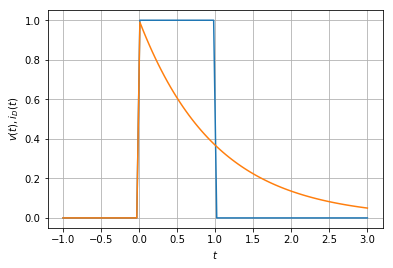

In [1]:
import numpy as np        
import matplotlib.pyplot as plt 
%matplotlib inline 
def v(t):
   conds = [t < 0, (t > 0)&(t<1), t>1]
   funcs = [lambda t: 0, lambda t: 1, lambda t: 0]
   return np.piecewise(t, conds, funcs)
def iD(t):
   conds = [t < 0, t > 0]
   funcs = [lambda t:0, lambda t: np.exp(-t)]
   return np.piecewise(t, conds, funcs)
tt = np.linspace(-1, 3, 100)
plt.plot(tt, v(tt))
plt.plot(tt, iD(tt))
plt.grid('on')
plt.xlabel('$t$')
plt.ylabel('$v(t), i_D(t)$')
plt.show()

#### Gráfica de $v(x)$ y algunas $i_D(t-x)$ 

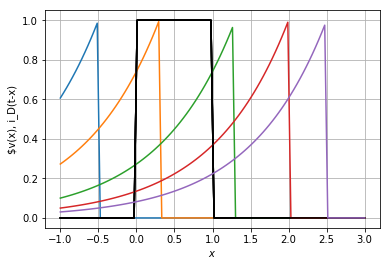

In [2]:
import numpy as np        
import matplotlib.pyplot as plt 
%matplotlib inline 
def v(t):
   conds = [t < 0, (t > 0)&(t<1), t>1]
   funcs = [lambda t: 0, lambda t: 1, lambda t: 0]
   return np.piecewise(t, conds, funcs)
def iD(t):
   conds = [t < 0, t > 0]
   funcs = [lambda t:0, lambda t: np.exp(-t)]
   return np.piecewise(t, conds, funcs)
tt = np.linspace(-1, 3, 100)
K = [-0.5, 0.3, 1.3, 2, 2.5]
for k in K:
    plt.plot(tt, v(tt), '-k')
    plt.plot(tt, iD(k-tt))
plt.grid('on')
plt.xlabel('$x$')
plt.ylabel('$v(x), i_D(t-x)')
plt.show()

#### Notemos que para calcular la integral de convolución; el producto $v(x)i_D(t-x)$ es cero cuando $t<0$ y no es cero cuando $t>0$. Y que cuando $0<t<1$ se integra de $0$ a $t$, y cuando $t>1$ se integra de $0$ a $1$. 

### Calculo gráfico de  $i(t) = v(t)*i_D(t)$ con Ipython

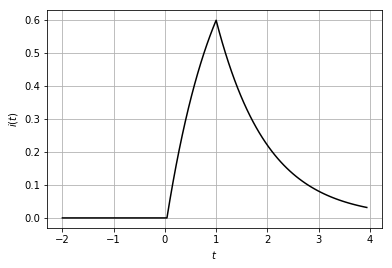

In [3]:
T = []
n = 100
a = -2; b = 4
R = [a + (b-a)*i/float(n) for i in range(n)]
for k in R:
    def f(x):
        return v(x)*iD(k-x)    
    s = 0
    for i in range(n):
        s += f(np.asarray([(a + (b-a)*i/float(n))]))
        ss = 0
        for i in range(len(s)):
            ss += s[i]
    T.append(ss*(b-a)/float(n))
plt.plot(R, T, '-k')
plt.grid('on')
plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

#### Notemos que la corriente crece durante la duración del pulso, y decrece hacia cero depués de desaparición del impulso debido al voltage inducido en la bobina, la bobina queda en corto con la resistencia.

### Planteando la integral de convolución y calculándola con sympy

#### Para $t<0, i(t) = v(t)*i_D(t)=0$

#### Para $0<t<1$, $i(t)=v(t)*i_D(t)= \int_0 ^t{\rm e}^{x-t}{\rm d}x$

In [4]:
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from __future__ import division
import sympy as sym
from sympy import *
x, t, z = symbols("x t z")

In [5]:
integrate(np.e**(x-t), (x,0,t))

                          -t
1.0 - 1.0⋅2.71828182845905  

#### Para $t>1, i(t) = v(t)*i_D(t)= \int_0 ^1 {\rm e}^{-t+x}{\rm d}x$

In [6]:
integrate(np.e**(-t+x), (x,0, 1))

                    -t + 1                       -t
1.0⋅2.71828182845905       - 1.0⋅2.71828182845905  

#### Por lo que $i(t) = 0, t<0; i(t) = 1- {\rm e}^{-t}, 0<t<1; i(t) = {\rm e}^{1-t} -{\rm e}^{-t}, t>1$. Cuya gráfica coincide con la presentada más arriba.

### Planteo de la integral con la transformada inversa

#### $i(t) = {\Im}^{-1}\{I_D(\omega)V(\omega) \} = \frac{1}{2\pi}\int_{- \infty}^{\infty} I_D(\omega)V(\omega){\rm d}\omega = \frac{1}{2\pi}\int_{- \infty}^{\infty}\frac{1}{1+{\rm j}\omega}\frac{2{\rm e}^{-{\rm j}\omega/2}{\rm \sin \omega/2} }{\omega}{\rm e}^{{\rm j}t\omega} {\rm d} \omega$

#### El calculo analítico con papel y lápiz de dicha integral involucra teoría de integración compleja, aquí no lo trataremos. Sin embargo podemos obtener su grafica aproximada integrando numéricamente para un ancho de banda limitada, $-\omega_0<\omega<\omega_0$, así,

#### $i(t) =  \frac{1}{2\pi}\int_{- \infty}^{\infty}\frac{1}{1+{\rm j}\omega}\frac{2{\rm e}^{-{\rm j}\omega/2}{\rm \sin \omega/2} }{\omega}{\rm e}^{{\rm j}t\omega} {\rm d} \omega = \frac{1}{2\pi}\int_{- \infty}^{\infty}{\rm Re}(\frac{1}{1+{\rm j}\omega}\frac{2{\rm e}^{-{\rm j}\omega/2}{\rm \sin \omega/2} }{\omega}{\rm e}^{{\rm j}t\omega}) {\rm d} \omega = \frac{1}{2\pi}\int_{- \omega_0}^{\omega_0}{\rm Re}(\frac{1}{1+{\rm j}\omega}\frac{2{\rm e}^{-{\rm j}\omega/2}{\rm \sin \omega/2} }{\omega}{\rm e}^{{\rm j}t\omega}) {\rm d} \omega$

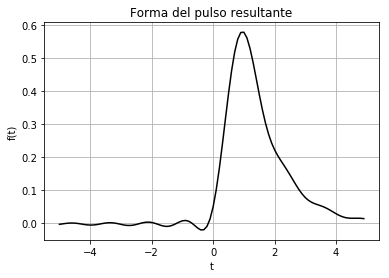

In [9]:
import cmath #se demora en dar la grafica
T = []; I1 = []
m = 100
t0 = 5 # (-t0<t<t0)
for i in range(0, m, 1):
    y = -t0 + i*2.0*t0/m
    T.append(y)

for t in T:
    w0 = 5
    w = np.linspace(-w0, w0, 100)#6)
    def f(w):
        return (1/np.pi)*re(np.exp(-1j*w/2.)*np.sin(w/2.)*np.exp(1j*w*t)/((w+0.000001)*(1+1j*w)))
    n = 500 #numero de subintervalos
    x = 0
    for k in range(n):
        k = k + 1
        x += f(-w0 + k*2.0*w0/n)*(2.0*np.abs(w0))/n
    I1.append(x)
plt.grid('on')
plt.title('Forma del pulso resultante')
plt.xlabel('t'); plt.ylabel('f(t)')     
plt.plot(T, I1, '-k')
plt.show()

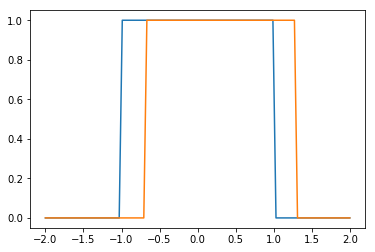

In [1]:
import numpy as np        
import matplotlib.pyplot as plt 
%matplotlib inline 
c = 1
def Lineal(x):
   conds = [x < -c, (x > -c) & (x < c), x > c]
   funcs = [lambda x: 0, lambda x: 1, lambda x: 0]
   return np.piecewise(x, conds, funcs)
def Exponencial(x):
   conds = [x < -c, (x > -c) & (x < c), x > c]
   funcs = [lambda x:0, lambda x: 1, lambda x: 0]
   return np.piecewise(x, conds, funcs)
xx = np.linspace(-c-1, c+1, 100)
k = 0.3
plt.plot(xx, Lineal(xx))
plt.plot(xx, Exponencial(k-xx))
plt.show()

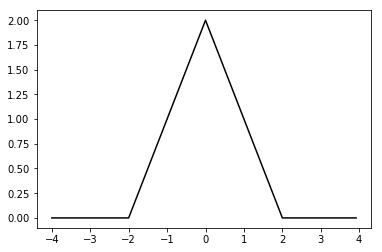

In [2]:
T = []
n = 100
a = 4
R = [-a + 2*a*i/float(n) for i in range(n)]
for k in R:
    def f(x):
        return Lineal(x)*Exponencial(k-x)    
    s = 0
    for i in range(n):
        s += f(np.asarray([(-a + 2*a*i/float(n))]))
        ss = 0
        for i in range(len(s)):
            ss += s[i]
    T.append(ss*2*a/float(n))
plt.plot(R, T, '-k')
plt.show()

In [11]:
import cmath

In [15]:
re(np.exp(1+1j))

1.46869393991589